## LSTM Models Training

In [1]:
import pandas as pd

from config import *

In [2]:
df = pd.read_csv('WELFake_Dataset_processed.tsv', sep='\t')
df.head(2)

,id,title,text,label,full_text,full_text_processed
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1.0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforcement high alert follow threat cop w...
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1.0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbelievable obamas attorney general say charl...


In [3]:
from sklearn.model_selection import train_test_split

train_texts, temp_text, train_labels, temp_labels = train_test_split(
  df['full_text_processed'],
  df['label'],
  random_state=2018,
  test_size=0.4,
  stratify=df['label']
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
  temp_text,
  temp_labels,
  random_state=2018,
  test_size=0.5,
  stratify=temp_labels
)

### Gensim Word2Vec initialization

In [4]:
import string
table = str.maketrans('', '', string.punctuation)

def makeWords(sentences):
  wordList = []
  for headline in sentences:
    words = headline.split(' ')
    stripped = [w.strip().translate(table) for w in words]
    wordList.append(stripped)
  return wordList

In [5]:
import gensim
mod = gensim.models.Word2Vec(sentences=makeWords(df['full_text_processed']), vector_size=EMBEDDING_DIM, window=5, min_count=1, workers=5)

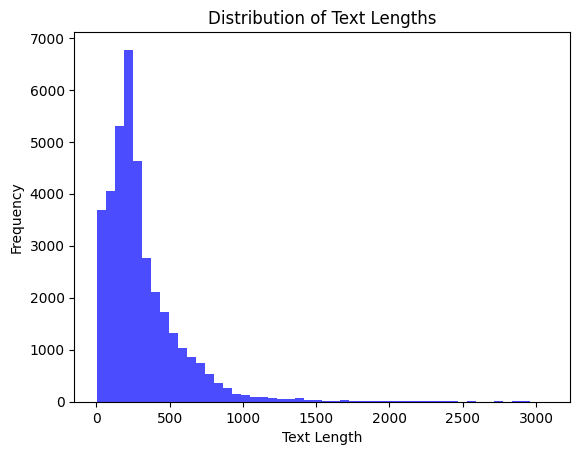

Mean Length: 309.46
Median Length: 239.00
90th Percentile: 623.00
Maximum Length: 3081.00


In [6]:
# Calculate text lengths
text_lengths = train_texts.apply(lambda x: len(str(x).split()))

# Analyse statistics
import matplotlib.pyplot as plt
import numpy as np

plt.hist(text_lengths, bins=50, color='blue', alpha=0.7)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

# Print some basic statistics
print(f"Mean Length: {np.mean(text_lengths):.2f}")
print(f"Median Length: {np.median(text_lengths):.2f}")
print(f"90th Percentile: {np.percentile(text_lengths, 90):.2f}")
print(f"Maximum Length: {np.max(text_lengths):.2f}")


In [7]:
from NewsDatasetLSTM import NewsDatasetLSTM
from torch.utils.data import DataLoader

max_len = 623 # was 785
# Instantiate datasets
train_dataset = NewsDatasetLSTM(train_texts, train_labels, mod, max_len=max_len)
val_dataset = NewsDatasetLSTM(val_texts, val_labels, mod, max_len=max_len)
test_dataset = NewsDatasetLSTM(test_texts, test_labels, mod, max_len=max_len)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size,drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [8]:
from Training.utils import train_evaluate_and_test_models

num_negatives = len(df[df['label'] == 0])
num_positives = len(df[df['label'] == 1])
class_counts = [num_negatives, num_positives]
results = train_evaluate_and_test_models(class_counts,train_loader, val_loader, test_loader, epochs=10)


Training Model 1 (LSTM with Attention)


Evaluating: 100%|██████████| 193/193 [00:27<00:00,  6.96it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.6304
Epoch 1/10
 Train Loss: 0.8065
 Val Loss: 0.6304
 Val Accuracy: 0.7061
 Val F1 Score: 0.7325
 Val AUC-ROC: 0.8648



Evaluating: 100%|██████████| 193/193 [00:31<00:00,  6.09it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.4546
Epoch 2/10
 Train Loss: 0.5748
 Val Loss: 0.4546
 Val Accuracy: 0.8412
 Val F1 Score: 0.8322
 Val AUC-ROC: 0.9165



Evaluating: 100%|██████████| 193/193 [00:30<00:00,  6.39it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.3508
Epoch 3/10
 Train Loss: 0.4646
 Val Loss: 0.3508
 Val Accuracy: 0.8689
 Val F1 Score: 0.8561
 Val AUC-ROC: 0.9427



Evaluating: 100%|██████████| 193/193 [00:43<00:00,  4.40it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.2920
Epoch 4/10
 Train Loss: 0.3975
 Val Loss: 0.2920
 Val Accuracy: 0.8864
 Val F1 Score: 0.8787
 Val AUC-ROC: 0.9606



Evaluating: 100%|██████████| 193/193 [00:44<00:00,  4.29it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.2617
Epoch 5/10
 Train Loss: 0.3461
 Val Loss: 0.2617
 Val Accuracy: 0.8987
 Val F1 Score: 0.8923
 Val AUC-ROC: 0.9688



Evaluating: 100%|██████████| 193/193 [00:51<00:00,  3.77it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.2334
Epoch 6/10
 Train Loss: 0.3038
 Val Loss: 0.2334
 Val Accuracy: 0.9173
 Val F1 Score: 0.9112
 Val AUC-ROC: 0.9756



Evaluating: 100%|██████████| 193/193 [00:46<00:00,  4.13it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.2202
Epoch 7/10
 Train Loss: 0.2618
 Val Loss: 0.2202
 Val Accuracy: 0.9211
 Val F1 Score: 0.9146
 Val AUC-ROC: 0.9785



Evaluating: 100%|██████████| 193/193 [00:48<00:00,  3.99it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.2156
Epoch 8/10
 Train Loss: 0.2364
 Val Loss: 0.2156
 Val Accuracy: 0.9257
 Val F1 Score: 0.9198
 Val AUC-ROC: 0.9796



Evaluating: 100%|██████████| 193/193 [00:46<00:00,  4.13it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.1870
Epoch 9/10
 Train Loss: 0.2133
 Val Loss: 0.1870
 Val Accuracy: 0.9399
 Val F1 Score: 0.9343
 Val AUC-ROC: 0.9834



Evaluating: 100%|██████████| 193/193 [00:44<00:00,  4.31it/s]


New best model saved at checkpoints\LSTMWithAttention.pt with val_loss: 0.1693
Epoch 10/10
 Train Loss: 0.2046
 Val Loss: 0.1693
 Val Accuracy: 0.9462
 Val F1 Score: 0.9407
 Val AUC-ROC: 0.9861


Testing with best model from checkpoint...
Checkpoint loaded from checkpoints\LSTMWithAttention.pt
Resuming from epoch 10


Evaluating: 100%|██████████| 194/194 [00:46<00:00,  4.13it/s]



Test Results:
Loss: 0.1801
Accuracy: 0.9408
F1 Score: 0.9349
Precision: 0.9040
Recall: 0.9680
ROC AUC: 0.9851

Training Model 2 (LSTM without Attention)


Evaluating: 100%|██████████| 193/193 [00:47<00:00,  4.10it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.7735
Epoch 1/10
 Train Loss: 0.7920
 Val Loss: 0.7735
 Val Accuracy: 0.4709
 Val F1 Score: 0.6156
 Val AUC-ROC: 0.5235



Evaluating: 100%|██████████| 193/193 [00:47<00:00,  4.07it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.7692
Epoch 2/10
 Train Loss: 0.7788
 Val Loss: 0.7692
 Val Accuracy: 0.4760
 Val F1 Score: 0.6182
 Val AUC-ROC: 0.5324



Evaluating: 100%|██████████| 193/193 [00:47<00:00,  4.02it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.7605
Epoch 3/10
 Train Loss: 0.7652
 Val Loss: 0.7605
 Val Accuracy: 0.4955
 Val F1 Score: 0.6294
 Val AUC-ROC: 0.7199



Evaluating: 100%|██████████| 193/193 [00:47<00:00,  4.05it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.5268
Epoch 4/10
 Train Loss: 0.6009
 Val Loss: 0.5268
 Val Accuracy: 0.8204
 Val F1 Score: 0.7757
 Val AUC-ROC: 0.8605



Evaluating: 100%|██████████| 193/193 [00:47<00:00,  4.10it/s]


Performance did not improve. Counter: 1/4
Epoch 5/10
 Train Loss: 0.5237
 Val Loss: 0.5493
 Val Accuracy: 0.8185
 Val F1 Score: 0.7666
 Val AUC-ROC: 0.8607



Evaluating: 100%|██████████| 193/193 [00:46<00:00,  4.11it/s]


Performance did not improve. Counter: 2/4
Epoch 6/10
 Train Loss: 0.5292
 Val Loss: 0.6040
 Val Accuracy: 0.7662
 Val F1 Score: 0.7635
 Val AUC-ROC: 0.8050



Evaluating: 100%|██████████| 193/193 [00:44<00:00,  4.32it/s]


Performance did not improve. Counter: 3/4
Epoch 7/10
 Train Loss: 0.5379
 Val Loss: 0.5617
 Val Accuracy: 0.7921
 Val F1 Score: 0.7870
 Val AUC-ROC: 0.8240



Evaluating: 100%|██████████| 193/193 [00:46<00:00,  4.11it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.5091
Epoch 8/10
 Train Loss: 0.5274
 Val Loss: 0.5091
 Val Accuracy: 0.8365
 Val F1 Score: 0.8100
 Val AUC-ROC: 0.8746



Evaluating: 100%|██████████| 193/193 [00:37<00:00,  5.22it/s]


New best model saved at checkpoints\LSTMWithoutAttention.pt with val_loss: 0.5060
Epoch 9/10
 Train Loss: 0.5149
 Val Loss: 0.5060
 Val Accuracy: 0.8341
 Val F1 Score: 0.8005
 Val AUC-ROC: 0.8724



Evaluating: 100%|██████████| 193/193 [00:45<00:00,  4.21it/s]


Performance did not improve. Counter: 1/4
Epoch 10/10
 Train Loss: 0.5072
 Val Loss: 0.5453
 Val Accuracy: 0.8097
 Val F1 Score: 0.7896
 Val AUC-ROC: 0.8516


Testing with best model from checkpoint...
Checkpoint loaded from checkpoints\LSTMWithoutAttention.pt
Resuming from epoch 9


Evaluating: 100%|██████████| 194/194 [00:49<00:00,  3.89it/s]



Test Results:
Loss: 0.5126
Accuracy: 0.8299
F1 Score: 0.7955
Precision: 0.8423
Recall: 0.7535
ROC AUC: 0.8694


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from typing import Dict, Optional, List
# class ModelComparisonVisualizer:
# 	"""
# 	A class for visualizing and comparing metrics between multiple models.
# 	Specifically designed for LSTM models with and without attention.
# 	"""
	
# 	def __init__(self, style: str = 'seaborn-v0_8-darkgrid'):
# 		"""
# 		Initialize the visualizer.
		
# 		Args:
# 			style (str): The matplotlib style to use
# 		"""
# 		self.style = style
# 		plt.style.use(style)
		
# 		self.colors = {
# 			'Model 1': '#2ecc71',  # Green for LSTM with Attention
# 			'Model 2': '#e74c3c',  # Red for LSTM without Attention
# 			'train': '#3498db',    # Blue
# 			'val': '#f1c40f',      # Yellow
# 			'test': '#9b59b6',     # Purple
# 			'grid': '#ecf0f1'      # Light gray
# 		}
		
		
# 	def create_comparison_dashboard(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
# 		"""
# 		Create a comprehensive dashboard comparing both models.
		
# 		Args:
# 			results: Dictionary containing results for both models
# 			save_path: Optional path to save the dashboard
# 		"""
# 		fig = plt.figure(figsize=(20, 12))
# 		gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
		
# 		# Plot training and validation metrics
# 		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
# 		positions = [(0,0), (0,1), (1,0), (1,1)]
		
# 		for metric, pos in zip(metrics, positions):
# 			ax = fig.add_subplot(gs[pos])
# 			self._plot_metric_comparison(ax, results, metric)
			
# 		# Add test metrics summary
# 		ax_test = fig.add_subplot(gs[:, 2])
# 		self._plot_test_metrics_summary(ax_test, results)
		
# 		plt.suptitle('Model Comparison Dashboard', fontsize=16, y=1.02)
		
# 		if save_path:
# 			plt.savefig(save_path, bbox_inches='tight', dpi=300)
			
# 		return fig
	
# 	def plot_detailed_metrics(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
# 		"""
# 		Create detailed plots for each metric including training, validation, and test results.
# 		"""
# 		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
# 		fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# 		axes = axes.ravel()
		
# 		for idx, metric in enumerate(metrics):
# 			ax = axes[idx]
# 			self._plot_detailed_metric(ax, results, metric)
			
# 		plt.tight_layout()
		
# 		if save_path:
# 			plt.savefig(save_path, bbox_inches='tight', dpi=300)
			
# 		return fig
	
# 	def plot_model_comparison_summary(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
# 		"""
# 		Create a summary plot comparing both models across all metrics.
# 		"""
# 		fig, ax = plt.subplots(figsize=(10, 6))
# 		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
		
# 		x = np.arange(len(metrics))
# 		width = 0.35
		
# 		# Plot bars for each model
# 		for i, model_name in enumerate(['Model 1', 'Model 2']):
# 			test_scores = [results[model_name]['test_metrics'][metric] for metric in metrics]
# 			ax.bar(x + i*width, test_scores, width, label=model_name, color=self.colors[model_name], alpha=0.7)
		
# 		ax.set_ylabel('Score')
# 		ax.set_title('Model Comparison - Test Metrics')
# 		ax.set_xticks(x + width/2)
# 		ax.set_xticklabels(metrics)
# 		ax.legend()
# 		ax.grid(True, alpha=0.3)
		
# 		if save_path:
# 			plt.savefig(save_path, bbox_inches='tight', dpi=300)
			
# 		return fig
	
# 	def _plot_metric_comparison(self, ax: plt.Axes, results: Dict, metric: str) -> None:
# 		"""Plot comparison of a specific metric for both models."""
# 		epochs = range(1, len(results['Model 1']['training_metrics'][metric]['val']) + 1)

# 		# Debugging: Print data being plotted
# 		print(f"Plotting {metric} for Model 1:")
# 		print(f"Train: {results['Model 1']['training_metrics'][metric]['train']}")
# 		print(f"Val: {results['Model 1']['training_metrics'][metric]['val']}")

# 		print(f"Plotting {metric} for Model 2:")
# 		print(f"Train: {results['Model 2']['training_metrics'][metric]['train']}")
# 		print(f"Val: {results['Model 2']['training_metrics'][metric]['val']}")

# 		for model_name in ['Model 1', 'Model 2']:
# 			val_scores = results[model_name]['training_metrics'][metric]['val']
# 			ax.plot(epochs, val_scores, label=f'{model_name} (Val)', color=self.colors[model_name])
# 		ax.set_title(f'{metric.replace("_", " ").title()} Comparison')
# 		ax.set_xlabel('Epoch')
# 		ax.set_ylabel('Score')
# 		ax.legend()
# 		ax.grid(True, alpha=0.3)

		
# 	def _plot_test_metrics_summary(self, ax: plt.Axes, results: Dict) -> None:
# 		"""Plot summary of test metrics for both models."""
# 		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
# 		x = np.arange(len(metrics))
# 		width = 0.35
		
# 		for i, model_name in enumerate(['Model 1', 'Model 2']):
# 			test_scores = [results[model_name]['test_metrics'][metric] for metric in metrics]
# 			ax.bar(x + i*width, test_scores, width, label=model_name, color=self.colors[model_name], alpha=0.7)
		
# 		ax.set_ylabel('Score')
# 		ax.set_title('Test Metrics Comparison')
# 		ax.set_xticks(x + width/2)
# 		ax.set_xticklabels(metrics)
# 		ax.legend()
# 		ax.grid(True, alpha=0.3)
		
# 	def _plot_detailed_metric(self, ax: plt.Axes, results: Dict, metric: str) -> None:
# 		"""Plot detailed view of a specific metric including training and validation."""
# 		epochs = range(1, len(results['Model 1']['training_metrics'][metric]['val']) + 1)
		
# 		for model_name in ['Model 1', 'Model 2']:
# 			train_scores = results[model_name]['training_metrics'][metric]['train']
# 			val_scores = results[model_name]['training_metrics'][metric]['val']
# 			test_score = results[model_name]['test_metrics'][metric]
			
# 			# Plot training and validation lines
# 			ax.plot(epochs, train_scores, '--', 
# 				   label=f'{model_name} (Train)', 
# 				   color=self.colors[model_name], 
# 				   alpha=0.5)
# 			ax.plot(epochs, val_scores, '-', 
# 				   label=f'{model_name} (Val)', 
# 				   color=self.colors[model_name])
			
# 			# Plot test score as a horizontal line
# 			ax.axhline(y=test_score, color=self.colors[model_name], 
# 					  linestyle=':', label=f'{model_name} (Test)', 
# 					  alpha=0.7)
			
# 		ax.set_title(f'{metric.replace("_", " ").title()}')
# 		ax.set_xlabel('Epoch')
# 		ax.set_ylabel('Score')
# 		ax.legend()
# 		ax.grid(True, alpha=0.3)

# # Example usage
# def visualize_results(results):
# 	"""
# 	Create and save all visualizations for the model comparison.
	
# 	Args:
# 		results: Dictionary containing results for both models
# 	"""
# 	visualizer = ModelComparisonVisualizer()
	
# 	# Create and save the main comparison dashboard
# 	visualizer.create_comparison_dashboard(results, 'model_comparison_dashboard.png')
	
# 	# Create and save detailed metrics plots
# 	visualizer.plot_detailed_metrics(results, 'detailed_metrics.png')
	
# 	# Create and save the summary comparison
# 	visualizer.plot_model_comparison_summary(results, 'model_comparison_summary.png')
	
# 	plt.show()

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Dict, Optional, List
from pathlib import Path

class ModelComparisonVisualizer:
	"""
	A class for visualizing and comparing metrics between multiple models.
	Specifically designed for LSTM models with and without attention.
	"""
	
	def __init__(self, style: str = 'seaborn-v0_8-darkgrid'):
		"""
		Initialize the visualizer.
		
		Args:
			style (str): The matplotlib style to use
		"""
		self.style = style
		plt.style.use(style)
		
		self.colors = {
			'Model 1': '#2ecc71',  # Green for LSTM with Attention
			'Model 2': '#e74c3c',  # Red for LSTM without Attention
			'train': '#3498db',    # Blue
			'val': '#f1c40f',      # Yellow
			'test': '#9b59b6',     # Purple
			'grid': '#ecf0f1'      # Light gray
		}
		self.save_dir = Path('Results')
		self.save_dir.mkdir(parents=True, exist_ok=True)
	
	def create_comparison_dashboard(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
		"""
		Create a comprehensive dashboard comparing both models.
		
		Args:
			results: Dictionary containing results for both models
			save_path: Optional path to save the dashboard
		"""
		fig = plt.figure(figsize=(20, 15))  # Increased height to accommodate confusion matrices
		gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)  # Added another row
		
		# Plot training and validation metrics
		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
		positions = [(0,0), (0,1), (1,0), (1,1)]
		
		for metric, pos in zip(metrics, positions):
			ax = fig.add_subplot(gs[pos])
			self._plot_metric_comparison(ax, results, metric)
			
		# Add test metrics summary
		ax_test = fig.add_subplot(gs[0:2, 2])
		self._plot_test_metrics_summary(ax_test, results)
		
		# Add confusion matrices
		ax_conf_m1 = fig.add_subplot(gs[2, 0])
		ax_conf_m2 = fig.add_subplot(gs[2, 1])
		self._plot_confusion_matrices(ax_conf_m1, ax_conf_m2, results)
		
		plt.suptitle('Model Comparison Dashboard', fontsize=16, y=1)
		
		if save_path:
			plt.savefig(self.save_dir/ save_path, bbox_inches='tight', dpi=300)
			
		return fig
	
	def plot_detailed_metrics(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
		"""
		Create detailed plots for each metric including training, validation, and test results.
		
		Args:
			results: Dictionary containing results for both models
			save_path: Optional path to save the dashboard
		"""
		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
		fig, axes = plt.subplots(2, 2, figsize=(15, 12))
		axes = axes.ravel()
		
		for idx, metric in enumerate(metrics):
			ax = axes[idx]
			self._plot_detailed_metric(ax, results, metric)
			
		plt.tight_layout()
		
		if save_path:
			plt.savefig(self.save_dir/ save_path, bbox_inches='tight', dpi=300)
			
		return fig
	
	def _plot_detailed_metric(self, ax: plt.Axes, results: Dict, metric: str) -> None:
		"""Plot detailed view of a specific metric including training and validation."""
		epochs = range(1, len(results['Model 1']['training_metrics'][metric]['val']) + 1)
		
		for model_name in ['Model 1', 'Model 2']:
			train_scores = results[model_name]['training_metrics'][metric]['train']
			val_scores = results[model_name]['training_metrics'][metric]['val']
			test_score = results[model_name]['test_metrics'][metric]
			
			# Plot training and validation lines
			ax.plot(epochs, train_scores, '--', 
				   label=f'{model_name} (Train)', 
				   color=self.colors[model_name], 
				   alpha=0.5)
			ax.plot(epochs, val_scores, '-', 
				   label=f'{model_name} (Val)', 
				   color=self.colors[model_name])
			
			# Plot test score as a horizontal line
			ax.axhline(y=test_score, color=self.colors[model_name], 
					  linestyle=':', label=f'{model_name} (Test)', 
					  alpha=0.7)
			
		ax.set_title(f'{metric.replace("_", " ").title()}')
		ax.set_xlabel('Epoch')
		ax.set_ylabel('Score')
		ax.legend()
		ax.grid(True, alpha=0.3)
	
	def plot_model_comparison_summary(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
		"""
		Create a summary plot comparing both models across all metrics.
		
		Args:
			results: Dictionary containing results for both models
			save_path: Optional path to save the plot
		"""
		fig, ax = plt.subplots(figsize=(10, 6))
		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
		
		x = np.arange(len(metrics))
		width = 0.35
		
		# Plot bars for each model
		for i, model_name in enumerate(['Model 1', 'Model 2']):
			test_scores = [results[model_name]['test_metrics'][metric] for metric in metrics]
			ax.bar(x + i*width, test_scores, width, label=model_name, color=self.colors[model_name], alpha=0.7)
		
		ax.set_ylabel('Score')
		ax.set_title('Model Comparison - Test Metrics')
		ax.set_xticks(x + width/2)
		ax.set_xticklabels(metrics)
		ax.legend()
		ax.grid(True, alpha=0.3)
		
		if save_path:
			plt.savefig(self.save_dir/ save_path, bbox_inches='tight', dpi=300)
			
		return fig
	
	def _plot_confusion_matrices(self, ax1: plt.Axes, ax2: plt.Axes, results: Dict) -> None:
		"""
		Plot confusion matrices for both models side by side.
		
		Args:
			ax1: Axes for Model 1's confusion matrix
			ax2: Axes for Model 2's confusion matrix
			results: Dictionary containing results for both models
		"""
		for ax, (model_name, title) in zip([ax1, ax2], 
										 [('Model 1', 'LSTM with Attention'),
										  ('Model 2', 'LSTM without Attention')]):
			
			# Get the confusion matrix from test metrics
			cm = results[model_name]['test_metrics']['confusion_matrix']
			
			# Create heatmap
			sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
					   xticklabels=['Negative', 'Positive'],
					   yticklabels=['Negative', 'Positive'])
			
			# Customize the plot
			ax.set_title(f'Confusion Matrix\n{title}')
			ax.set_xlabel('Predicted')
			ax.set_ylabel('Actual')
	
	def plot_confusion_matrix_comparison(self, results: Dict, save_path: Optional[str] = None) -> plt.Figure:
		"""
		Create a standalone figure comparing confusion matrices between models.
		
		Args:
			results: Dictionary containing results for both models
			save_path: Optional path to save the plot
		"""
		fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
		
		self._plot_confusion_matrices(ax1, ax2, results)
		
		plt.suptitle('Confusion Matrix Comparison', fontsize=14)
		plt.tight_layout()
		
		if save_path:
			plt.savefig(self.save_dir/ save_path, bbox_inches='tight', dpi=300)
			
		return fig
	
	def _plot_metric_comparison(self, ax: plt.Axes, results: Dict, metric: str) -> None:
		"""Plot comparison of a specific metric for both models."""
		epochs = range(1, len(results['Model 1']['training_metrics'][metric]['val']) + 1)

		for model_name in ['Model 1', 'Model 2']:
			val_scores = results[model_name]['training_metrics'][metric]['val']
			ax.plot(epochs, val_scores, label=f'{model_name} (Val)', color=self.colors[model_name])
		ax.set_title(f'{metric.replace("_", " ").title()} Comparison')
		ax.set_xlabel('Epoch')
		ax.set_ylabel('Score')
		ax.legend()
		ax.grid(True, alpha=0.3)
	
	def _plot_test_metrics_summary(self, ax: plt.Axes, results: Dict) -> None:
		"""Plot summary of test metrics for both models."""
		metrics = ['accuracy', 'precision', 'recall', 'f1_score']
		x = np.arange(len(metrics))
		width = 0.35
		
		for i, model_name in enumerate(['Model 1', 'Model 2']):
			test_scores = [results[model_name]['test_metrics'][metric] for metric in metrics]
			ax.bar(x + i*width, test_scores, width, label=model_name, color=self.colors[model_name], alpha=0.7)
		
		ax.set_ylabel('Score')
		ax.set_title('Test Metrics Comparison')
		ax.set_xticks(x + width/2)
		ax.set_xticklabels(metrics)
		ax.legend()
		ax.grid(True, alpha=0.3)

# Example usage
def visualize_results(results):
	"""
	Create and save all visualizations for the model comparison.
	
	Args:
		results: Dictionary containing results for both models
	"""
	visualizer = ModelComparisonVisualizer()
	
	# Create and save the main comparison dashboard
	visualizer.create_comparison_dashboard(results, 'model_comparison_dashboard.png')
	
	# Create and save detailed metrics plots
	visualizer.plot_detailed_metrics(results, 'detailed_metrics.png')
	
	# Create and save the summary comparison
	visualizer.plot_model_comparison_summary(results, 'model_comparison_summary.png')
	
	# Create and save confusion matrix comparison
	visualizer.plot_confusion_matrix_comparison(results, 'confusion_matrix_comparison.png')
	
	plt.show()

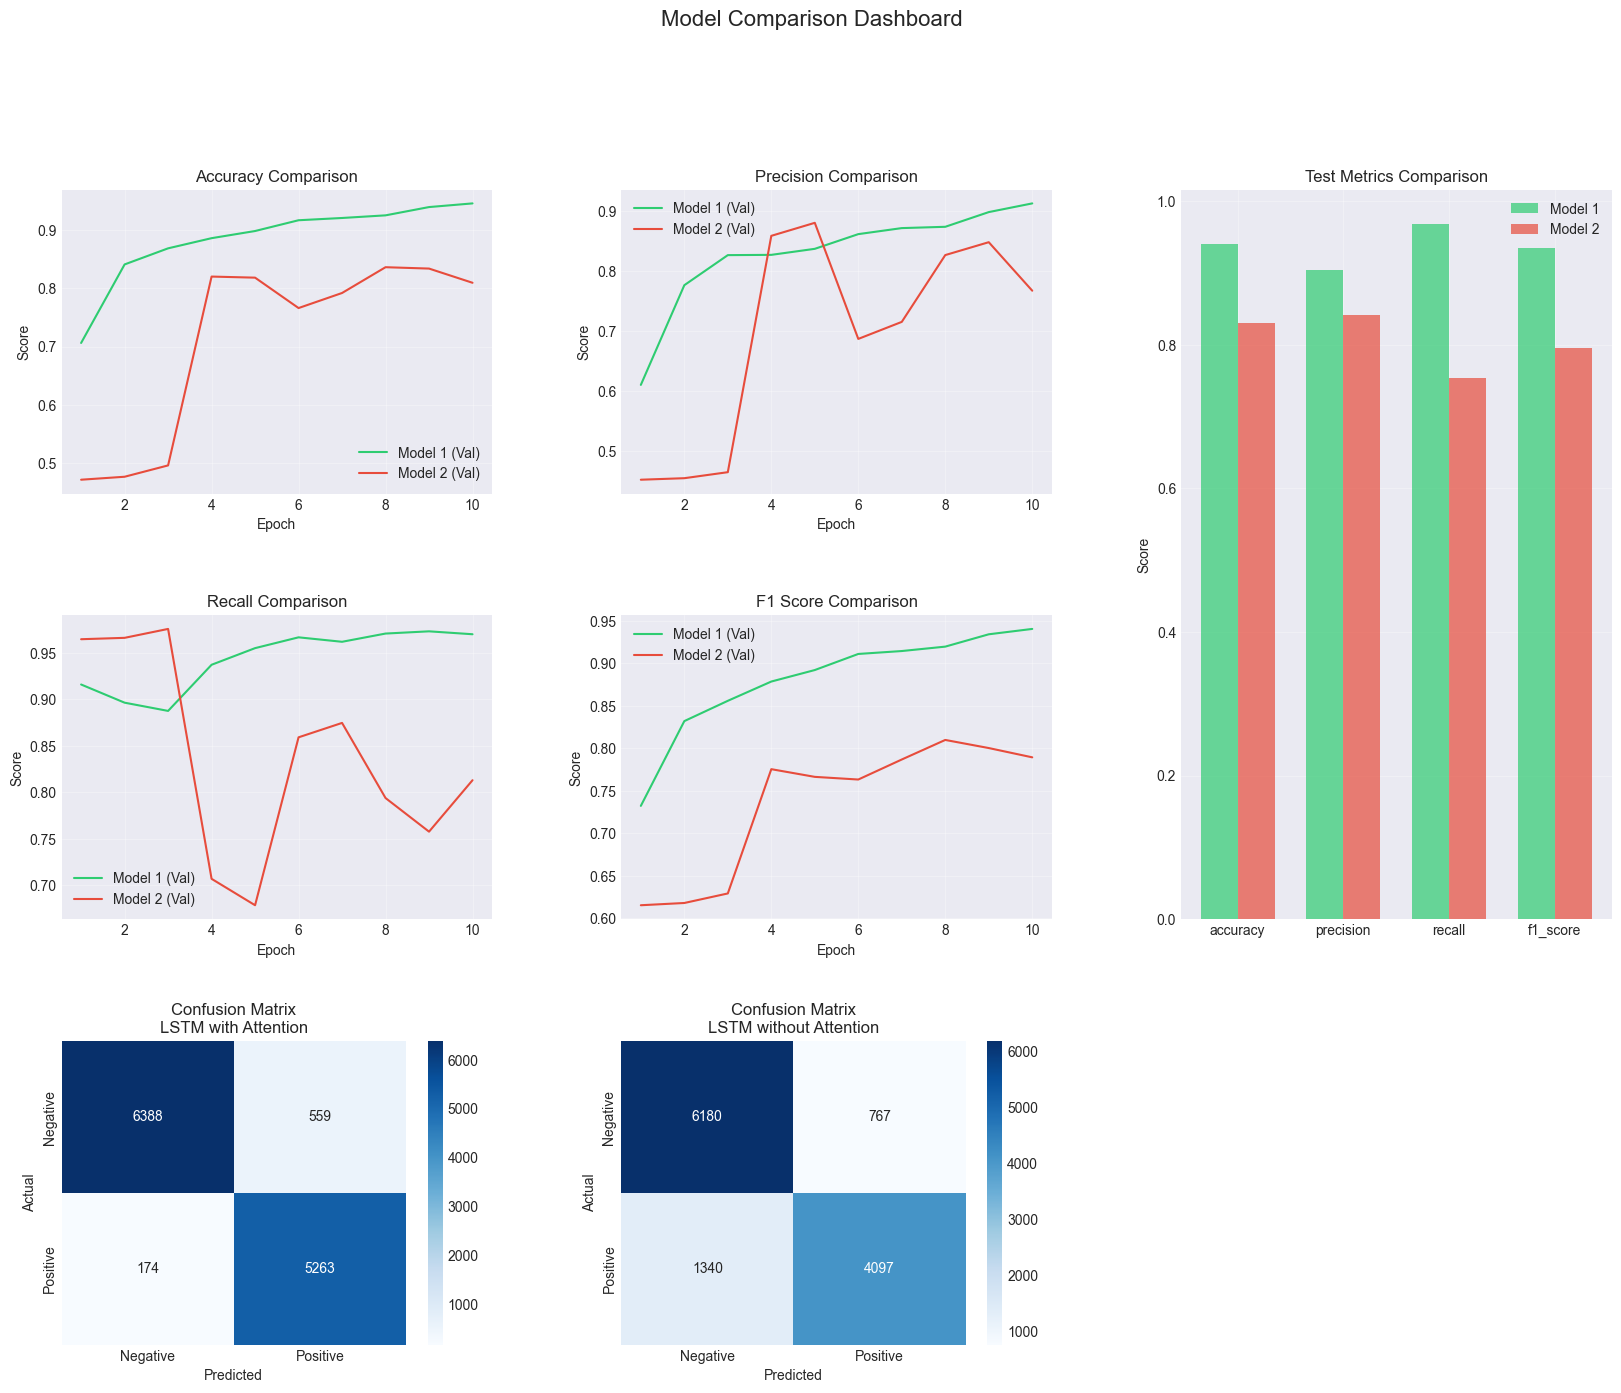

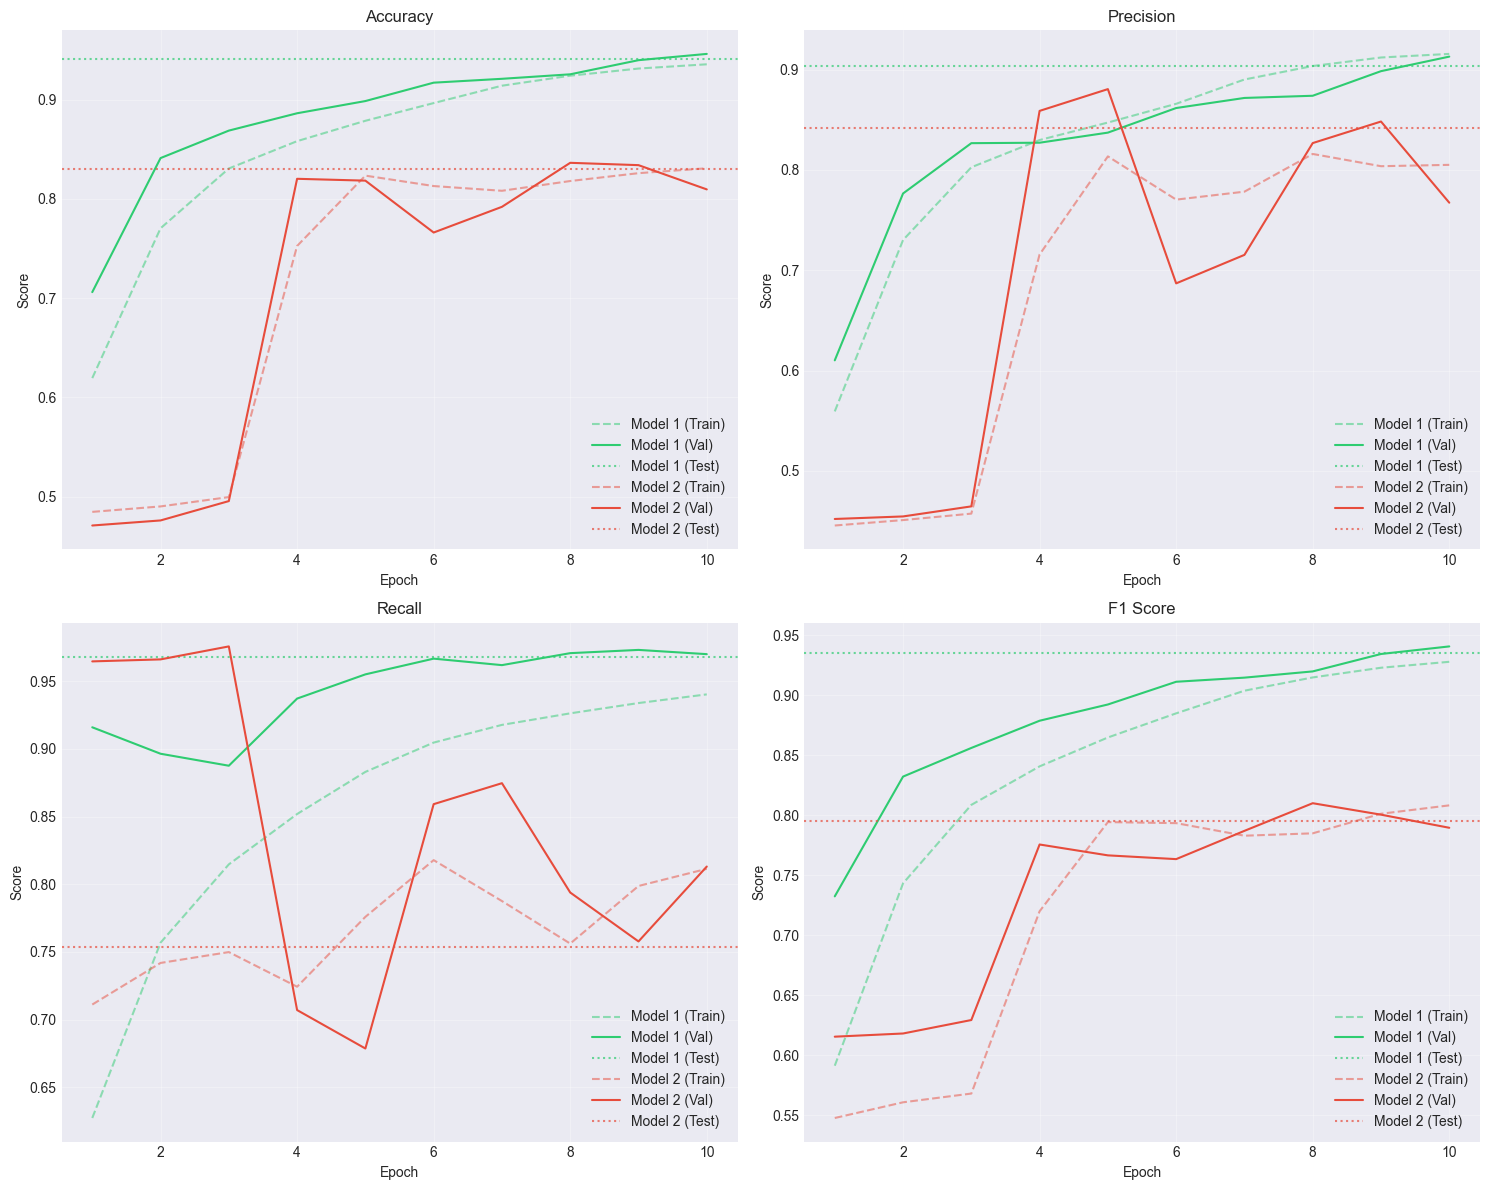

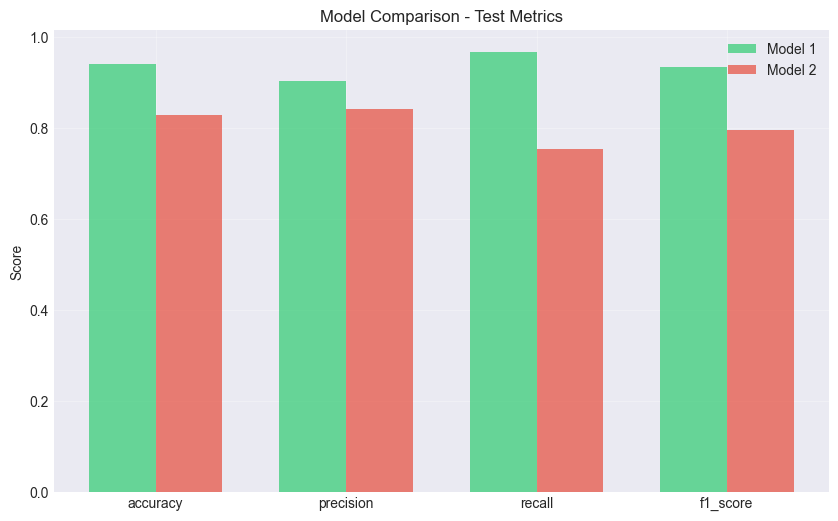

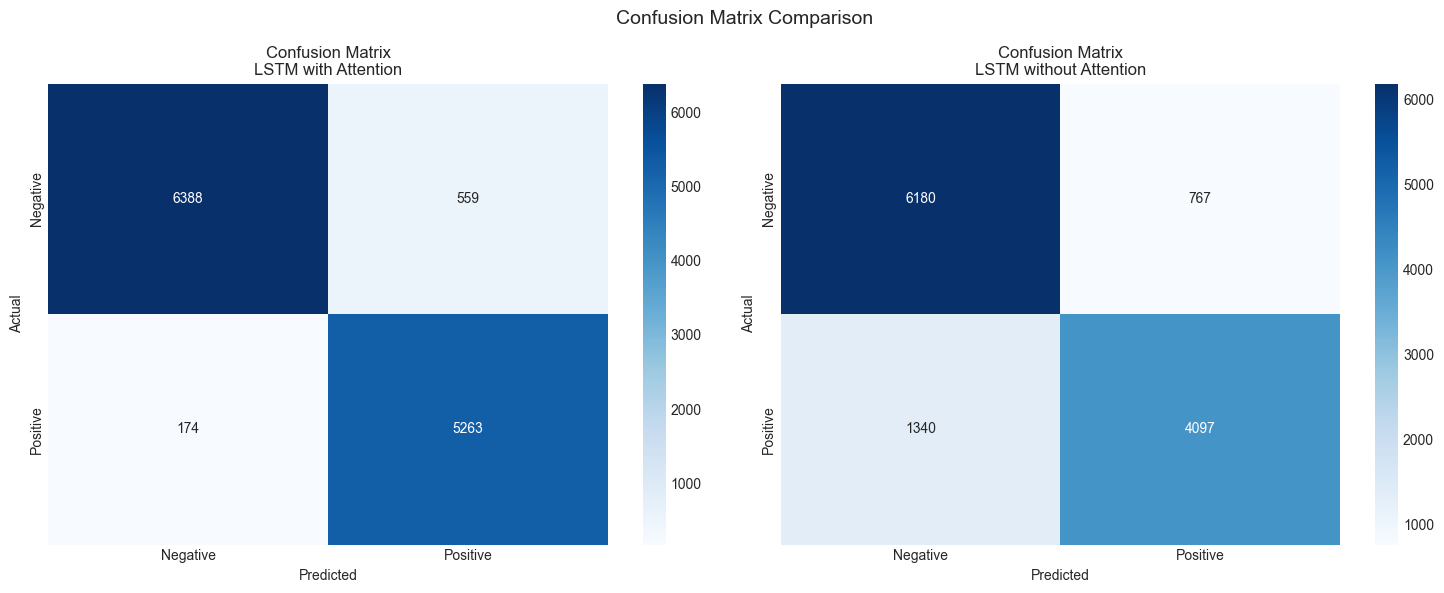

In [37]:
visualize_results(results)

In [11]:
def compare_models(results):
    print("\nModel Comparison:")
    print("-" * 50)

    # Compare training/validation metrics
    print("\nTraining/Validation Metrics (Key Values):")
    metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1_score']
    
    for metric in metrics_to_compare:
        print(f"\n{metric.upper()}:")
        
        for model_name in results:
            val_scores = results[model_name]['training_metrics'][metric]['val']
            final_score = val_scores[-1]
            best_score = max(val_scores)
            mean_score = np.mean(val_scores)
            
            print(f"{model_name}: Final: {final_score:.4f}, Best: {best_score:.4f}, Mean: {mean_score:.4f}")
    
    # Compare test metrics (display only final score)
    print("\nTest Metrics (Final Score):")
    for metric in metrics_to_compare:
        print(f"\n{metric.upper()}:")
        
        for model_name in results:
            test_score = results[model_name]['test_metrics'][metric]
            print(f"{model_name}: {test_score:.4f}")
            
compare_models(results)



Model Comparison:
--------------------------------------------------

Training/Validation Metrics (Key Values):

ACCURACY:
Model 1: Final: 0.9462, Best: 0.9462, Mean: 0.8852
Model 2: Final: 0.8097, Best: 0.8365, Mean: 0.7120

PRECISION:
Model 1: Final: 0.9131, Best: 0.9131, Mean: 0.8297
Model 2: Final: 0.7674, Best: 0.8807, Mean: 0.6956

RECALL:
Model 1: Final: 0.9700, Best: 0.9731, Mean: 0.9434
Model 2: Final: 0.8131, Best: 0.9757, Mean: 0.8391

F1_SCORE:
Model 1: Final: 0.9407, Best: 0.9407, Mean: 0.8812
Model 2: Final: 0.7896, Best: 0.8100, Mean: 0.7356

Test Metrics (Final Score):

ACCURACY:
Model 1: 0.9408
Model 2: 0.8299

PRECISION:
Model 1: 0.9040
Model 2: 0.8423

RECALL:
Model 1: 0.9680
Model 2: 0.7535

F1_SCORE:
Model 1: 0.9349
Model 2: 0.7955
